In [1]:
import os
import pandas as pd
import numpy as np
import jax
import jax.numpy as jnp
import tensorflow as tf
import tensorflow_probability.substrates.jax as tfp
from astropy.table import Table

2023-08-24 15:04:20.074558: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tfd = tfp.distributions
rng = jax.random.PRNGKey(0)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
from lcmcmc.preprocessing import add_object_band_index, preprocess_SNANA, extract_subsample

In [4]:
from lcmcmc.utils import get_data_dir_path

In [5]:
train_data_head_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/train_final_master_HEAD.FITS'
train_data_phot_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/train_final_master_PHOT.FITS'

In [6]:
df_head = Table.read(train_data_head_path, format='fits').to_pandas()
df_phot = Table.read(train_data_phot_path, format='fits').to_pandas()

In [7]:
np.unique(df_phot["PHOTFLAG"])

array([     0,   4096,   6144, 999999], dtype=int32)

In [8]:
df_phot = df_phot[(df_phot["PHOTFLAG"] == 4096) | (df_phot["PHOTFLAG"] == 999999)]

In [9]:
df_phot["SNID"]

0           5081715
1           5081715
2           6596653
3           6596653
4           6596653
             ...   
1616081    33259310
1616082    33259310
1616084    33259310
1616207    54214877
1616227    54214877
Name: SNID, Length: 256367, dtype: int64

In [10]:
df_phot["PHOTFLAG"]

0          999999
1          999999
2          999999
3          999999
4          999999
            ...  
1616081      4096
1616082      4096
1616084      4096
1616207      4096
1616227      4096
Name: PHOTFLAG, Length: 256367, dtype: int32

In [11]:
np.amin(df_phot['FLUXCALERR'])

40.52946090698242

# Load data

In [12]:
df_head, df_phot=extract_subsample(df_head=df_head, df_phot=df_phot, event_type="random", num_sample=10)

In [13]:
df_phot

,SNID,FLUXCAL,FLUXCALERR,FLT,MJD,FIELD,PHOTFLAG,PHOTPROB,PSF_SIG1,SKY_SIG,ZEROPT,SIM_MAGOBS
85111,8056025,361.307709,58.330029,b'r',57629.1590,b'846',4096,0.0,1.04,42.310001,28.590000,21.031834
85114,8056025,284.907288,68.332855,b'r',57639.1408,b'846',4096,0.0,1.05,49.990002,28.600000,21.064842
165550,13615385,1149.500854,77.978485,b'g',57698.5016,b'259',4096,0.0,1.24,41.529999,28.469999,19.827055
165552,13615385,1519.406250,80.189636,b'g',57702.5228,b'259',4096,0.0,1.28,40.080002,28.450001,19.502195
165553,13615385,1851.196655,214.086349,b'r',57705.4184,b'259',4096,0.0,1.29,113.349998,28.469999,19.275360
...,...,...,...,...,...,...,...,...,...,...,...,...
1602900,29752425,1020.772949,91.311012,b'r',57609.4379,b'296',4096,0.0,1.15,48.110001,28.540001,17.883900
1602902,29752425,1282.621704,92.956100,b'r',57612.4176,b'296',4096,0.0,1.17,50.299999,28.580000,17.867134
1602909,29752425,1447.168823,90.571449,b'r',57630.3980,b'296',4096,0.0,1.13,45.380001,28.500000,17.854052
1602913,29752425,993.377991,136.589783,b'r',57643.2956,b'296',4096,0.0,1.30,72.959999,28.559999,17.926960


In [14]:
df_phot = add_object_band_index(df_phot, bands=[b'g', b'r'])

In [15]:
df_phot

,SNID,FLUXCAL,FLUXCALERR,FLT,MJD,FIELD,PHOTFLAG,PHOTPROB,PSF_SIG1,SKY_SIG,ZEROPT,SIM_MAGOBS,object_index,band_index
85111,8056025,361.307709,58.330029,b'r',57629.1590,b'846',4096,0.0,1.04,42.310001,28.590000,21.031834,0,1
85114,8056025,284.907288,68.332855,b'r',57639.1408,b'846',4096,0.0,1.05,49.990002,28.600000,21.064842,0,1
165550,13615385,1149.500854,77.978485,b'g',57698.5016,b'259',4096,0.0,1.24,41.529999,28.469999,19.827055,1,0
165552,13615385,1519.406250,80.189636,b'g',57702.5228,b'259',4096,0.0,1.28,40.080002,28.450001,19.502195,1,0
165553,13615385,1851.196655,214.086349,b'r',57705.4184,b'259',4096,0.0,1.29,113.349998,28.469999,19.275360,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602900,29752425,1020.772949,91.311012,b'r',57609.4379,b'296',4096,0.0,1.15,48.110001,28.540001,17.883900,9,1
1602902,29752425,1282.621704,92.956100,b'r',57612.4176,b'296',4096,0.0,1.17,50.299999,28.580000,17.867134,9,1
1602909,29752425,1447.168823,90.571449,b'r',57630.3980,b'296',4096,0.0,1.13,45.380001,28.500000,17.854052,9,1
1602913,29752425,993.377991,136.589783,b'r',57643.2956,b'296',4096,0.0,1.30,72.959999,28.559999,17.926960,9,1


In [16]:
new_object_df = preprocess_SNANA(df_head=df_head, df_phot=df_phot, bands=[b'g', b'r'], norm_band_index=None)

In [17]:
new_object_df = new_object_df[(new_object_df["time"].values>-20) & (new_object_df["time"].values<50)]

# Load PCs

In [18]:
from kndetect.utils import load_pcs

pcs = load_pcs()

# Create joint distribution model

In [19]:
from lcmcmc.model import jd_model_pcs
from lcmcmc.parametric_fits import parametric_fn_pcs

NOTE that the flux values are normalized. 
To get the actual values, multiply flux and fluxerr columns with norm_factor

In [20]:
mu_kn = np.load(os.path.join(get_data_dir_path(), "mu_kn.npy"))
scale_kn = np.load(os.path.join(get_data_dir_path(), "scale_kn.npy"))

mu_non_kn = np.load(os.path.join(get_data_dir_path(), "mu_non_kn.npy"))
scale_non_kn = np.load(os.path.join(get_data_dir_path(), "scale_non_kn.npy"))

In [21]:
index = np.zeros((len(new_object_df), 2), dtype=np.int32)

index[:, 0] = np.asarray(new_object_df["object_index"].values)
index[:, 1] = np.asarray(new_object_df["band_index"].values)

x_range = jnp.asarray(new_object_df["time"])

observed_value = jnp.array(np.asarray(new_object_df["flux"]), dtype=jnp.float32)
observed_sigma = jnp.array(np.asarray(new_object_df["fluxerr"]), dtype=jnp.float32)

jd = jd_model_pcs(index, x_range, pcs, mu_kn, scale_kn, mu_non_kn, scale_non_kn)

In [22]:
x_range

Array([  0.    ,   9.9818,  -6.9795,  -2.9583,   0.    ,   0.    ,
       -10.8948,  -3.0075,   0.    ,   3.0015,  -7.0637,   0.    ,
         6.9512,  10.9378,  13.9347,  -7.0011,  -4.0414,   0.    ,
         2.9577,  10.0009,  14.0017,  17.0012,  19.9619,  43.976 ,
        -8.0199,   0.    ,   6.9794,   9.9793,  12.8988,   0.    ,
         3.0006,  17.9629,  21.0014,  29.9585,  47.9201,   0.    ,
         0.    ,  -6.976 ,   0.    , -16.9984, -13.9777,  -8.9831,
         0.    ,   3.0152,  35.9944,  41.8957,  45.8728,  49.9088,
       -19.9757, -17.0144, -14.0122, -10.9936,  -8.0353,   0.    ,
         6.9667,  12.9209,  15.9059,  20.9198,  33.8818,  48.8624,
       -17.9804,   0.    ,  12.8976,  23.9157], dtype=float32)

In [23]:
observed_sigma

Array([0.16144142, 0.18912648, 0.04005514, 0.04119094, 0.07424971,
       0.11564755, 0.2912149 , 0.21143627, 0.20939325, 0.20830083,
       0.03476106, 0.0364623 , 0.05192242, 0.07028219, 0.06819053,
       0.04034509, 0.04513954, 0.04276439, 0.04654323, 0.08624981,
       0.11280035, 0.11773043, 0.05469956, 0.10187425, 0.07690163,
       0.03777735, 0.03580344, 0.03496322, 0.05366032, 0.05172902,
       0.05229852, 0.07080547, 0.0549866 , 0.05003898, 0.05876691,
       0.21438055, 0.09975131, 0.15886651, 0.16847092, 0.0228503 ,
       0.01863193, 0.01893994, 0.02370395, 0.0234917 , 0.02437384,
       0.0202166 , 0.01726778, 0.01923799, 0.02042655, 0.02047953,
       0.02002514, 0.02020324, 0.01986705, 0.02197705, 0.02040543,
       0.02027721, 0.02008429, 0.02050551, 0.02045611, 0.02095115,
       0.06423307, 0.06258527, 0.09438414, 0.06861129], dtype=float32)

In [24]:
jd

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/lcmcmc/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:795: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)


<tfp.distributions.JointDistributionCoroutineAutoBatched 'JointDistributionCoroutineAutoBatched' batch_shape=[] event_shape=StructTuple(
  coeffs_kn=[10, 6],
  coeffs_non_kn=[10, 6],
  sigma=[64],
  obs_kn=[64],
  obs_non_kn=[64]
) dtype=StructTuple(
  coeffs_kn=float32,
  coeffs_non_kn=float32,
  sigma=float32,
  obs_kn=float32,
  obs_non_kn=float32
)>

In [25]:
# Run the mcmc

run_mcmc = jax.jit(
    lambda seed: tfp.experimental.mcmc.windowed_adaptive_nuts(
        100, 
        jd, 
        n_chains=4, 
        seed=seed,
        sigma=observed_sigma, 
        obs_kn=observed_value,
        obs_non_kn=observed_value
    )
)

rng, sample_rng = jax.random.split(rng, 2)
mcmc_samples, sampler_stats = run_mcmc(sample_rng)

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/lcmcmc/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:795: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)
/pbs/throng/lsst/users/bbiswas/miniconda3/envs/lcmcmc/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:795: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)


In [26]:
import matplotlib.pyplot as plt

In [32]:
np.max(index[:, 0])

9

7


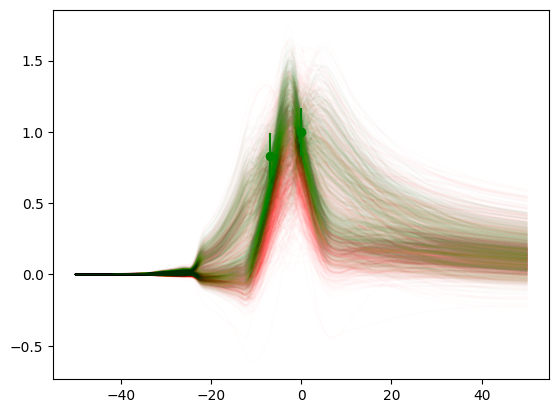

1


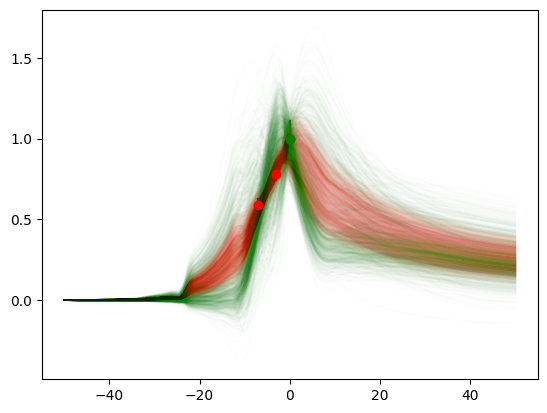

2


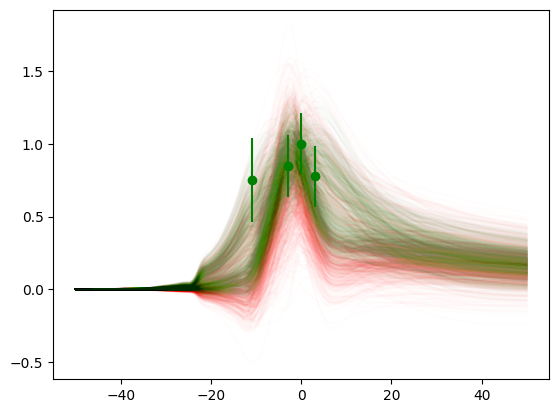

5


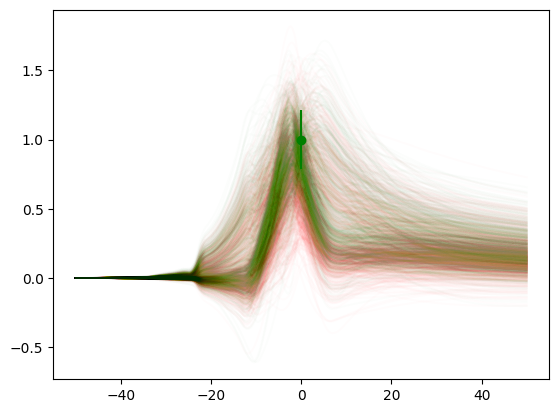

2


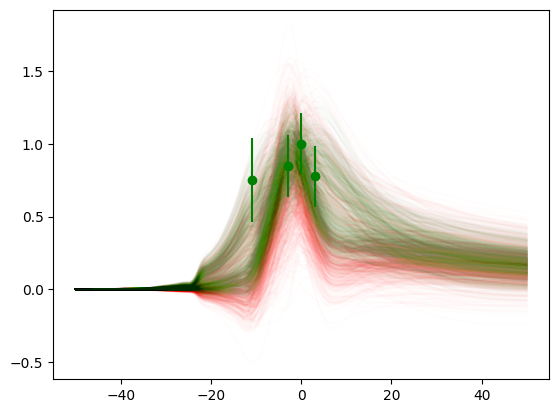

7


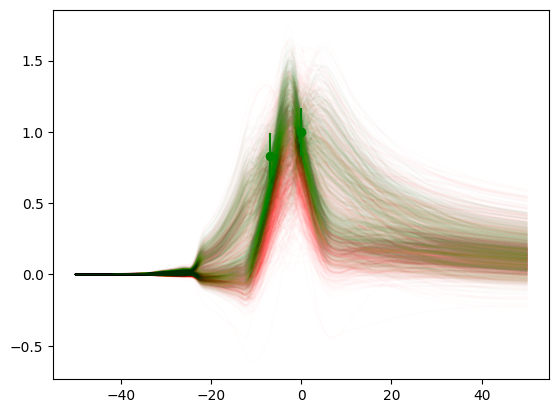

4


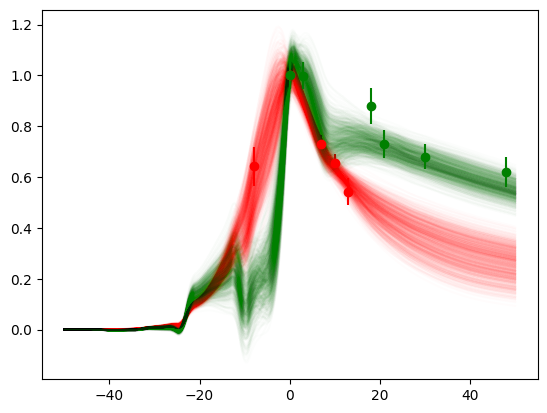

2


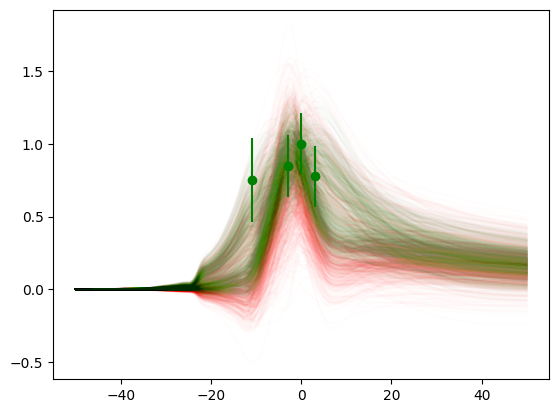

6


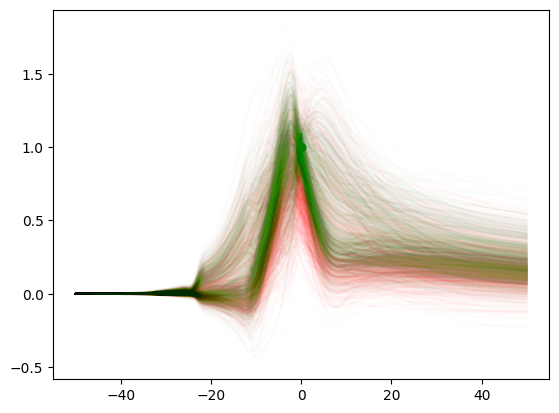

7


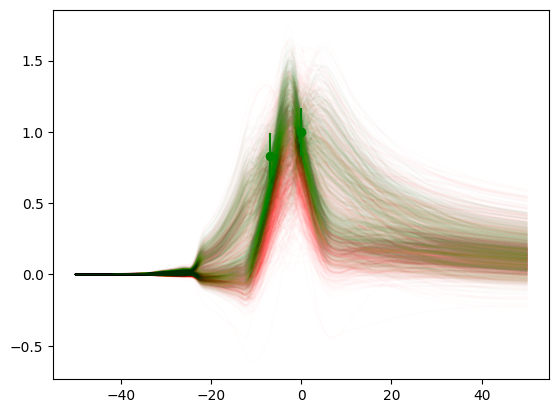

In [33]:
colors = ['r', 'g']
num_plot=10
for event_num in np.random.randint(0, np.max(index[:, 0]), size=num_plot):
    print(event_num)
    plt.figure()
    object_df = new_object_df[new_object_df['object_index']==event_num]
    for band in range(2):
        for sample_no in range(100):
            for chain_num in range(4):
                c1 = mcmc_samples.coeffs_kn[sample_no, chain_num, event_num, 0 + band*3]
                c2 = mcmc_samples.coeffs_kn[sample_no, chain_num, event_num, 1 + band*3]
                c3 = mcmc_samples.coeffs_kn[sample_no, chain_num, event_num, 2 + band*3]
                
                predictions = parametric_fn_pcs(c1, c2, c3, pcs, np.arange(0,401, 1))
                plt.plot(np.arange(-50, 50.25, .25), predictions, alpha=.01, color=colors[band])
                
                c1 = mcmc_samples.coeffs_non_kn[sample_no, chain_num, event_num, 0 + band*3]
                c2 = mcmc_samples.coeffs_non_kn[sample_no, chain_num, event_num, 1 + band*3]
                c3 = mcmc_samples.coeffs_non_kn[sample_no, chain_num, event_num, 2 + band*3]
                
                predictions = parametric_fn_pcs(c1, c2, c3, pcs, np.arange(0,401, 1))
                plt.plot(np.arange(-50, 50.25, .25), predictions, alpha=.01, color=colors[band])


        band_df = object_df[object_df['band_index']==band]
        plt.errorbar(band_df["time"], band_df["flux"], yerr=band_df["fluxerr"], fmt="o", color=colors[band])

    
    plt.show()